<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocesamiento de datos con RNN**
##  Creado por [M.Sc. Ruben Quispe](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
### Curso [Machine Learning](https://eie.pe/curso-machine-learning/)

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # Se usarán las 10,000 palabras más comunes de la base de datos
maxlen = 500  # Usaremos solamente las primeras 500 palabras de cada crítica
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# **Definimos el modelo**

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN #RNN -> Recurrent Neural Network

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 21s 136ms/step - loss: 0.6745 - acc: 0.5678 - val_loss: 0.6037 - val_acc: 0.6982
Epoch 2/10
157/157 [==============================] - 20s 131ms/step - loss: 0.4443 - acc: 0.8046 - val_loss: 0.4547 - val_acc: 0.7946
Epoch 3/10
157/157 [==============================] - 20s 130ms/step - loss: 0.2985 - acc: 0.8759 - val_loss: 0.4166 - val_acc: 0.8330
Epoch 4/10
157/157 [==============================] - 20s 130ms/step - loss: 0.2140 - acc: 0.9166 - val_loss: 0.4551 - val_acc: 0.8050
Epoch 5/10
157/157 [==============================] - 21s 131ms/step - loss: 0.1485 - acc: 0.9463 - val_loss: 0.5128 - val_acc: 0.7756
Epoch 6/10
157/157 [==============================] - 21s 131ms/step - loss: 0.1159 - acc: 0.9596 - val_loss: 0.5233 - val_acc: 0.8004
Epoch 7/10
157/157 [==============================] - 20s 130ms/step - loss: 0.0605 - acc: 0.9817 - val_loss: 0.5814 - val_acc: 0.7960
Epoch 8/10
157/157 [==============================] - 2

Best accuracy epoch :  3, Value :  0.8330000043
Best loss epoch :  3, Value :  0.4165914655


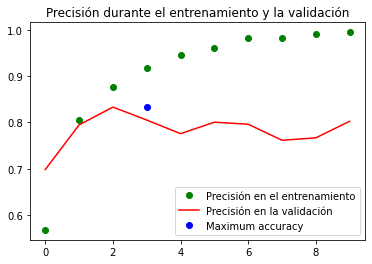

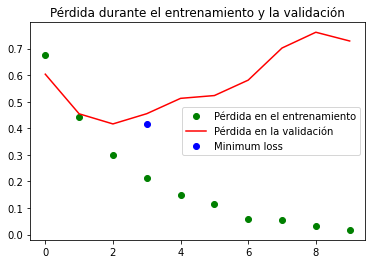

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .10f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

# **Implementación de una LSTM**

In [4]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 47s 297ms/step - loss: 0.5067 - acc: 0.7560 - val_loss: 0.4016 - val_acc: 0.8282
Epoch 2/10
157/157 [==============================] - 50s 320ms/step - loss: 0.2997 - acc: 0.8823 - val_loss: 0.3300 - val_acc: 0.8558
Epoch 3/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2395 - acc: 0.9089 - val_loss: 0.2885 - val_acc: 0.8866
Epoch 4/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2012 - acc: 0.9255 - val_loss: 0.2933 - val_acc: 0.8826
Epoch 5/10
157/157 [==============================] - 50s 319ms/step - loss: 0.1798 - acc: 0.9341 - val_loss: 0.3430 - val_acc: 0.8768
Epoch 6/10
157/157 [==============================] - 54s 346ms/step - loss: 0.1658 - acc: 0.9418 - val_loss: 0.2908 - val_acc: 0.8876
Epoch 7/10
157/157 [==============================] - 50s 319ms/step - loss: 0.1454 - acc: 0.9484 - val_loss: 0.3333 - val_acc: 0.8886
Epoch 8/10
157/157 [==============================] - 5

Best accuracy epoch :  7, Value :  0.8885999918
Best loss epoch :  3, Value :  0.2885023654


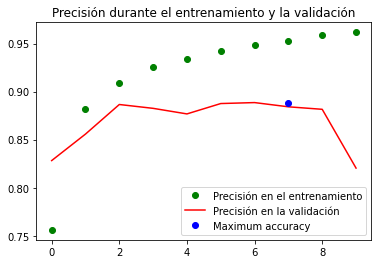

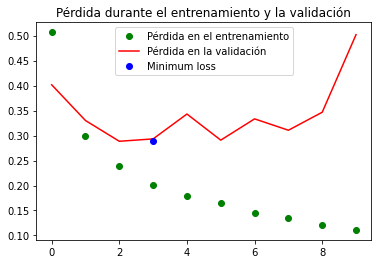

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .10f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()